### JUMP2DIGITAL - Hackathon Data Science

### Notebook Author: Eduardo Baffi

##### Reto a desarrollar para la fase online:

Akadelivers es una empresa de reparto a domicilio especializada en la entrega de paquetes en menos de 1 hora, lo que se denomina (Q-commerce = Quick commerce) Esta empresa tiene una aplicación móvil con la que sus usuarios pueden elegir entre un catálogo de productos de tiendas locales de su ciudad y que les sean entregados en menos de 10 minutos a la dirección que deseen.

Cuando un usuario pide un pedido a través de Akadelivers se le cobra directamente el coste total (coste del producto + gastos de servicio + gastos de envío). Una vez el usuario ha pagado un producto, el repartidor que se encuentre más próximo a la tienda que tiene el producto se acerca a esta, paga el producto, lo recoge y lo lleva a la dirección que el usuario ha elegido. Akadelivers se lo llevara a la dirección indicada.

##### Objetivos del reto:

Para las preguntas 1,2,3 y 4 emplea el dataset train.csv Para la pregunta 5 deberás emplear el dataset 'train.csv' y 'test_X.csv'.

1. ¿Cuáles son los 3 paises en los que más pedidos se realizan?

2. ¿Cuáles son las horas en las que se realizan más pedidos en España?

3. ¿Cuál es el precio medio por pedido en la tienda con ID 12513?

4. Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8horas.
Turno 1 (00:00-08:00)
Turno 2 (08:00-16:00)
Turno 3 (16:00-00:00)

Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda. (ej: Turno 1 el 30%, Turno 2 el 10% y Turno 3 el 60%).

5. Realiza un modelo predictivo de machine learning a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status').
Siendo:

Para simplificar, podeis asignar los valores 'CanceledStatus' a 0 y los valores 'DeliveredStatus' a 1.

0 = CanceledStatus

1 = DeliveredStatus


Entrega las predicciones en un csv a parte. Tal y como puede verse en el ejemplo de 'ejemplo_predicciones'. La calidad de la predicción se medira a partir del f1-score(macro).

##### Variables del dataset:

order_id: Número de identificación del pedido.

local_time: Hora local a la que se realiza el pedido.

country_code: Código del pais en el que se realiza el pedido.

store_address: Número de tienda en a la que se realiza el pedido.

payment_status: Estado del pedido.

n_of_products: Número de productos que se han comprado en ese pedido.

products_total: Cantidad en Euros que el usuario ha comprado en la app.

final_status: Estado final del pedido (este será la variable 'target' a predecir) que indicara si el pedido será finalmente entregado o cancelado. Hay dos tipos de estado:

  - CanceledStatus: La entrega se ha cancelado.
  - DeliveredStatus: La entrega se ha realizado correctamente.

** Code comments are in English

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Read the dataset about orders parameters
orders_df=pd.read_csv('train.csv')
orders_df

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus
...,...,...,...,...,...,...,...,...
54325,33443728,13:54:33,AR,63825,PAID,2,10.39,DeliveredStatus
54326,33499561,17:16:09,AR,27741,PAID,1,9.07,DeliveredStatus
54327,32895248,20:14:59,PA,65895,PAID,2,1.65,DeliveredStatus
54328,32792276,13:24:05,ES,20134,PAID,6,8.04,DeliveredStatus


In [3]:
# Check for null values
orders_df.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
final_status      0
dtype: int64

In [4]:
# Check for duplicted rows
orders_df.duplicated().sum()

0

In [5]:
# Check for the number of unique values for each parameter of the dataset
orders_df.nunique()

order_id          54330
local_time        32905
country_code         23
store_address      5627
payment_status        3
n_of_products        27
products_total     3904
final_status          2
dtype: int64

In [6]:
# Statistical characteristics of the numerical parameters
orders_df.describe()

,order_id,store_address,n_of_products,products_total
count,5.433000e+04,54330.000000,54330.000000,54330.000000
mean,3.278267e+07,41609.384981,2.815792,9.838136
std,4.459402e+05,21903.267141,2.430936,9.260352
min,3.150378e+07,190.000000,1.000000,0.000000
25%,3.240007e+07,21369.000000,1.000000,4.130000
50%,3.278159e+07,45993.500000,2.000000,7.130000
75%,3.318380e+07,62004.000000,3.000000,12.770000
max,3.356085e+07,75236.000000,39.000000,221.480000


In [7]:
# Info resumen of the dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        54330 non-null  int64  
 1   local_time      54330 non-null  object 
 2   country_code    54330 non-null  object 
 3   store_address   54330 non-null  int64  
 4   payment_status  54330 non-null  object 
 5   n_of_products   54330 non-null  int64  
 6   products_total  54330 non-null  float64
 7   final_status    54330 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [8]:
# Check the number of orders per country
orders_df.country_code.value_counts().to_frame()

,country_code
AR,11854
ES,11554
TR,5696
PE,4284
UA,3729
IT,2537
EC,2265
RO,1957
FR,1911
EG,1643


##### Question 1 - "¿Cuáles son los 3 paises en los que más pedidos se realizan?"

In [9]:
# Answer to question 1 (¿Cuáles son los 3 paises en los que más pedidos se realizan?)
# The table shows the nmber of orders of the top 3 contries

orders_df.country_code.value_counts().head(3).to_frame()

,country_code
AR,11854
ES,11554
TR,5696


In [10]:
# Percentage of orders per country

orders_df.country_code.value_counts(2).head(3).to_frame()

,country_code
AR,0.218185
ES,0.212663
TR,0.104841


#### Answer to question 1: The top 3 countries with more orders are: Argentina, Spain and Turkey 

##### Question 2 - "¿Cuáles son las horas en las que se realizan más pedidos en España?"

In [11]:
# Number of orders per local time in Spain
orders_df[orders_df.country_code=="ES"].local_time.value_counts().to_frame()

,local_time
10:03:06,17
10:03:07,17
21:03:01,16
10:03:05,15
10:03:08,15
...,...
21:26:11,1
18:01:03,1
14:04:27,1
22:00:15,1


In [12]:
ordersNew_df=orders_df.copy() # Generate copy of the original dataframe to start exploring data
ordersNew_df['local_time'] = pd.to_datetime(orders_df['local_time'], format='%H:%M:%S') # Assign column local_time as datetime
ordersNew_df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,1900-01-01 14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,1900-01-01 11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,1900-01-01 11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,1900-01-01 20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,1900-01-01 21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [13]:
ordersNew_df['hour'] = ordersNew_df['local_time'].dt.hour # Creating a column with only the hour of the order
ordersNew_df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hour
0,33446280,1900-01-01 14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14
1,33107339,1900-01-01 11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11
2,32960645,1900-01-01 11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11
3,32089564,1900-01-01 20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20
4,32157739,1900-01-01 21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21


In [14]:
# Number of orders for each full hour
ordersNew_df[orders_df.country_code=="ES"].hour.value_counts().to_frame()

,hour
20,1716
21,1155
19,1128
13,1047
14,956
18,821
15,696
17,680
22,665
16,618


In [15]:
# Top 5 hours with more orders
ordersNew_df[orders_df.country_code=="ES"].hour.value_counts().head(5).to_frame()

,hour
20,1716
21,1155
19,1128
13,1047
14,956


#### Answer to question 2: The top 5 hours with more orders in Spain are (beggining with the first place): 20h, 21h, 19h, 13h and 14h. 

If it the exactly time, including minutes and seconds, the first place would be: 10:03:06 and 10:03:07

##### Question 3 - "¿Cuál es el precio medio por pedido en la tienda con ID 12513?"

In [16]:
# Mean of all orders
ordersNew_df.products_total.mean()

9.838135652494017

In [17]:
ordersNew_df[orders_df.store_address==12513].head(1)

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hour
58,32660725,1900-01-01 12:58:13,IT,12513,PAID,2,8.9,DeliveredStatus,12


In [18]:
# Store ID 12513 - Mean price of orders 
ordersNew_df[ordersNew_df.store_address==12513].products_total.mean().round(2)

17.39

#### Answer to question 3: The average price per order of the store with ID 12513 is 17.39 Euros. 
The store is located in Italy.

##### Question 4 
Teniendo en cuenta los picos de demanda en España, si los repartidores trabajan en turnos de 8 horas. Turno 1 (00:00-08:00) Turno 2 (08:00-16:00) Turno 3 (16:00-00:00)
##### "¿Qué porcentaje de repartidores pondrías por cada turno para que sean capaces de hacer frente a los picos de demanda.?"
(ej: Turno 1 el 30%, Turno 2 el 10% y Turno 3 el 60%).

In [19]:
# Create a column "shift" based on the range of hours proposed by the question 4

i=0

result = []

while i < len(ordersNew_df):
    if  ordersNew_df.hour[i] >= 0 and ordersNew_df.hour[i] < 8:
        result.append("1")
    elif ordersNew_df.hour[i] >= 8 and ordersNew_df.hour[i] < 16:
         result.append("2")
    else:
         result.append("3")                                       
    i+=1

ordersNew_df["shift"]=result

ordersNew_df

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status,hour,shift
0,33446280,1900-01-01 14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus,14,2
1,33107339,1900-01-01 11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus,11,2
2,32960645,1900-01-01 11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus,11,2
3,32089564,1900-01-01 20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus,20,3
4,32157739,1900-01-01 21:32:16,AR,13917,PAID,1,5.36,CanceledStatus,21,3
...,...,...,...,...,...,...,...,...,...,...
54325,33443728,1900-01-01 13:54:33,AR,63825,PAID,2,10.39,DeliveredStatus,13,2
54326,33499561,1900-01-01 17:16:09,AR,27741,PAID,1,9.07,DeliveredStatus,17,3
54327,32895248,1900-01-01 20:14:59,PA,65895,PAID,2,1.65,DeliveredStatus,20,3
54328,32792276,1900-01-01 13:24:05,ES,20134,PAID,6,8.04,DeliveredStatus,13,2


In [20]:
# Number of orders per shift 
ordersNew_df['shift'].value_counts()

3    31602
2    21984
1      744
Name: shift, dtype: int64

In [21]:
# Check the number of orders of shift 1 
# THe other shifts can be checked by changing the number inside the command

ordersNew_df[ordersNew_df['shift']== "3"].hour.value_counts()

20    6692
21    5494
19    4918
18    3520
22    3347
17    2978
16    2934
23    1719
Name: hour, dtype: int64

In [22]:
# Number of orders per shift in Spain
ordersNew_df[ordersNew_df.country_code=="ES"]['shift'].value_counts().to_frame()

,shift
3,7053
2,4487
1,14


In [23]:
# Percentage of orders per shift in Spain
pd.set_option('display.float_format', '{:.2%}'.format)
ordersNew_df[ordersNew_df.country_code=="ES"]['shift'].value_counts(normalize = True).to_frame()

,shift
3,61.04%
2,38.84%
1,0.12%


In [24]:
# Reset all options of format
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



#### Answer to question 4: 

The percentange of delivery riders for each shift should be: 

* Shift 1 (00:00:00-07:59:59): 0.1%

* Shift 2 (08:00:00-15:59:59): 38.9% 

* Shift 3 (16:00:00-23:59:59): 61.0% 

The number of riders per shift should be rounded depending on the total number of delivery riders, considering it the number of riders is a integer.

##### Question 5

Realiza un modelo predictivo de machine learning a partir del dataset 'train.csv' en el cual a partir de las variables predictoras que se entregan en el dataset 'test_X' se pueda predecir si el pedido se cancelará o no (columna 'final_status').

Para simplificar, podeis asignar los valores 'CanceledStatus' a 0 y los valores 'DeliveredStatus' a 1.

In [25]:
#Check the target class distribution
orders_df.final_status.value_counts().to_frame()

,final_status
DeliveredStatus,48498
CanceledStatus,5832


In [26]:
orders_df.final_status.value_counts(normalize = True).to_frame()

# The class distribution is unbalanced, since one almost 90% of the points have "DeliveredStatus" value

,final_status
DeliveredStatus,0.892656
CanceledStatus,0.107344


In [27]:
# Generate copy of the train dataframe to start exploring data
ordersTrain_df=orders_df.copy() 

In [28]:
ordersTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        54330 non-null  int64  
 1   local_time      54330 non-null  object 
 2   country_code    54330 non-null  object 
 3   store_address   54330 non-null  int64  
 4   payment_status  54330 non-null  object 
 5   n_of_products   54330 non-null  int64  
 6   products_total  54330 non-null  float64
 7   final_status    54330 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 3.3+ MB


In [30]:
# Train dataset containing the target parameter ("final_status")
ordersTrain_df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,DeliveredStatus
1,33107339,11:47:41,GT,23487,PAID,2,5.20,DeliveredStatus
2,32960645,11:53:53,CR,62229,PAID,1,6.03,DeliveredStatus
3,32089564,20:15:21,ES,29446,PAID,6,6.37,DeliveredStatus
4,32157739,21:32:16,AR,13917,PAID,1,5.36,CanceledStatus


In [35]:
# Change values in the target column inti binary
ordersTrain_df.final_status[ordersTrain_df.final_status=='DeliveredStatus'] = 1
ordersTrain_df.final_status[ordersTrain_df.final_status=='CanceledStatus'] = 0
ordersTrain_df

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total,final_status
0,33446280,14:11:09,AR,55379,PAID,2,11.88,1
1,33107339,11:47:41,GT,23487,PAID,2,5.20,1
2,32960645,11:53:53,CR,62229,PAID,1,6.03,1
3,32089564,20:15:21,ES,29446,PAID,6,6.37,1
4,32157739,21:32:16,AR,13917,PAID,1,5.36,0
...,...,...,...,...,...,...,...,...
54325,33443728,13:54:33,AR,63825,PAID,2,10.39,1
54326,33499561,17:16:09,AR,27741,PAID,1,9.07,1
54327,32895248,20:14:59,PA,65895,PAID,2,1.65,1
54328,32792276,13:24:05,ES,20134,PAID,6,8.04,1


In [36]:
# Compare values of "final_status" values with the original dataset
orders_df.final_status.value_counts(normalize = True).to_frame()

,final_status
DeliveredStatus,0.892656
CanceledStatus,0.107344


In [38]:
# Change "final_status" to integer
ordersTrain_df['final_status']=ordersTrain_df['final_status'].astype(str).astype(int)

In [39]:
ordersTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        54330 non-null  int64  
 1   local_time      54330 non-null  object 
 2   country_code    54330 non-null  object 
 3   store_address   54330 non-null  int64  
 4   payment_status  54330 non-null  object 
 5   n_of_products   54330 non-null  int64  
 6   products_total  54330 non-null  float64
 7   final_status    54330 non-null  int32  
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 3.1+ MB


In [40]:
# Assign column local_time as datetime
ordersTrain_df['local_time'] = pd.to_datetime(ordersTrain_df['local_time'], format='%H:%M:%S') 

In [41]:
# Create column that representes the total of seconds for each local time
import datetime

ordersTrain_df['time_secs'] = (ordersTrain_df['local_time']- datetime.datetime(1900, 1, 1)).dt.total_seconds()

In [42]:
ordersTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54330 entries, 0 to 54329
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        54330 non-null  int64         
 1   local_time      54330 non-null  datetime64[ns]
 2   country_code    54330 non-null  object        
 3   store_address   54330 non-null  int64         
 4   payment_status  54330 non-null  object        
 5   n_of_products   54330 non-null  int64         
 6   products_total  54330 non-null  float64       
 7   final_status    54330 non-null  int32         
 8   time_secs       54330 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(3), object(2)
memory usage: 3.5+ MB


In [43]:
# Columns of train dataset
ordersTrain_df.columns

Index(['order_id', 'local_time', 'country_code', 'store_address',
       'payment_status', 'n_of_products', 'products_total', 'final_status',
       'time_secs'],
      dtype='object')

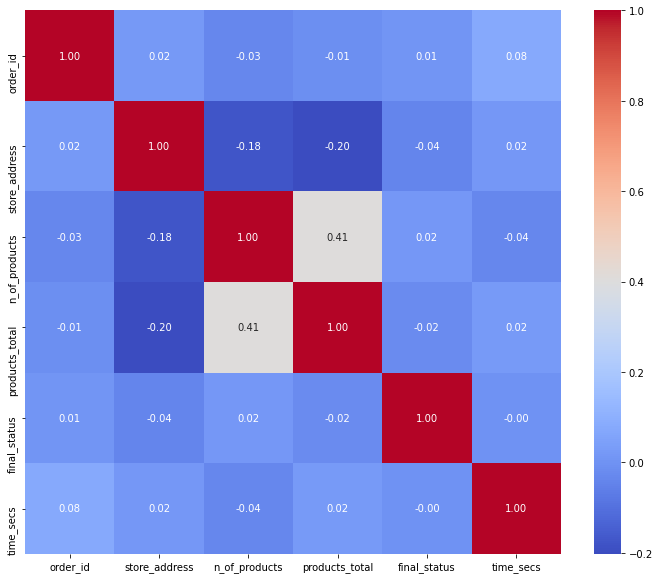

In [44]:
# Not necessarily every feature is going to have an impact on the output variable. It is necessary to do feature selection.
# Using Pearson Correlation for numerical features

import seaborn as sns

plt.figure(figsize=(12,10))
cor = ordersTrain_df.corr()
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [45]:
# Correlation with output variable
cor_target = abs(cor["final_status"])
cor_target

order_id          0.005487
store_address     0.039823
n_of_products     0.018167
products_total    0.019999
final_status      1.000000
time_secs         0.002493
Name: final_status, dtype: float64

In [46]:
#Filter categorical features
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(ordersTrain_df)

data_categorical = ordersTrain_df[categorical_columns]
data_categorical.head()

,country_code,payment_status
0,AR,PAID
1,GT,PAID
2,CR,PAID
3,ES,PAID
4,AR,PAID


In [47]:
# Just the numerical features were evaluated until now
# Now the categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=ordersTrain_df.index)
result.head()

,country_code_AR,country_code_BR,country_code_CI,country_code_CL,country_code_CR,country_code_DO,country_code_EC,country_code_EG,country_code_ES,country_code_FR,...,country_code_PE,country_code_PR,country_code_PT,country_code_RO,country_code_TR,country_code_UA,country_code_UY,payment_status_DELAYED,payment_status_NOT_PAID,payment_status_PAID
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
ordersTrain_df = ordersTrain_df.join(result) # Join the columns genetared after OneHotEncoder
ordersTrain_df = ordersTrain_df.drop(['country_code','payment_status'], 1) # Drop original column that where transformed
ordersTrain_df.head(1)

,order_id,local_time,store_address,n_of_products,products_total,final_status,time_secs,country_code_AR,country_code_BR,country_code_CI,...,country_code_PE,country_code_PR,country_code_PT,country_code_RO,country_code_TR,country_code_UA,country_code_UY,payment_status_DELAYED,payment_status_NOT_PAID,payment_status_PAID
0,33446280,1900-01-01 14:11:09,55379,2,11.88,1,51069.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
# Correlation of parameters
cor = ordersTrain_df.corr()
cor_target = abs(cor["final_status"])
cor_target

order_id                   0.005487
store_address              0.039823
n_of_products              0.018167
products_total             0.019999
final_status               1.000000
time_secs                  0.002493
country_code_AR            0.068319
country_code_BR            0.012372
country_code_CI            0.013331
country_code_CL            0.013443
country_code_CR            0.014750
country_code_DO            0.005977
country_code_EC            0.002717
country_code_EG            0.006817
country_code_ES            0.046537
country_code_FR            0.015536
country_code_GE            0.011340
country_code_GT            0.007301
country_code_IT            0.003194
country_code_KE            0.003052
country_code_MA            0.025409
country_code_PA            0.002515
country_code_PE            0.021812
country_code_PR            0.002284
country_code_PT            0.022555
country_code_RO            0.016616
country_code_TR            0.018523
country_code_UA            0

In [50]:
ordersTrain_df.columns

Index(['order_id', 'local_time', 'store_address', 'n_of_products',
       'products_total', 'final_status', 'time_secs', 'country_code_AR',
       'country_code_BR', 'country_code_CI', 'country_code_CL',
       'country_code_CR', 'country_code_DO', 'country_code_EC',
       'country_code_EG', 'country_code_ES', 'country_code_FR',
       'country_code_GE', 'country_code_GT', 'country_code_IT',
       'country_code_KE', 'country_code_MA', 'country_code_PA',
       'country_code_PE', 'country_code_PR', 'country_code_PT',
       'country_code_RO', 'country_code_TR', 'country_code_UA',
       'country_code_UY', 'payment_status_DELAYED', 'payment_status_NOT_PAID',
       'payment_status_PAID'],
      dtype='object')

In [51]:
# Load data
# 'order_id' was excluded becaused it is considered not relevant for our model
# It was created a column called 'time_secs' that show the local time in seconds. Column 'local_time' is not in the model because of its type.
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'country_code_AR', 'country_code_BR',
       'country_code_CI', 'country_code_CL', 'country_code_CR',
       'country_code_DO', 'country_code_EC', 'country_code_EG',
       'country_code_ES', 'country_code_FR', 'country_code_GE',
       'country_code_GT', 'country_code_IT', 'country_code_KE',
       'country_code_MA', 'country_code_PA', 'country_code_PE',
       'country_code_PR', 'country_code_PT', 'country_code_RO',
       'country_code_TR', 'country_code_UA', 'country_code_UY',
       'payment_status_DELAYED', 'payment_status_NOT_PAID',
       'payment_status_PAID', 'time_secs']  

X = ordersTrain_df[classification_columns]
y = ordersTrain_df['final_status']

In [ ]:
# Use lazypredict library to help evaluate the best options for the model

import lazypredict
from lazypredict.Supervised import LazyClassifier, LazyRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

 41%|█████████████████████████████████▌                                               | 12/29 [08:28<37:09, 131.16s/it]

In [234]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.63,0.58,0.58,0.70,0.17
DecisionTreeClassifier,0.82,0.55,0.55,0.82,0.61
BaggingClassifier,0.86,0.55,0.55,0.84,3.49
RandomForestClassifier,0.87,0.54,0.54,0.85,9.56
ExtraTreeClassifier,0.82,0.54,0.54,0.82,0.22
ExtraTreesClassifier,0.86,0.53,0.53,0.84,7.21
KNeighborsClassifier,0.88,0.51,0.51,0.84,39.84
XGBClassifier,0.89,0.51,0.51,0.84,8.46
GaussianNB,0.88,0.51,0.51,0.84,0.21


In [52]:
ordersTrain_df.columns

Index(['order_id', 'local_time', 'store_address', 'n_of_products',
       'products_total', 'final_status', 'time_secs', 'country_code_AR',
       'country_code_BR', 'country_code_CI', 'country_code_CL',
       'country_code_CR', 'country_code_DO', 'country_code_EC',
       'country_code_EG', 'country_code_ES', 'country_code_FR',
       'country_code_GE', 'country_code_GT', 'country_code_IT',
       'country_code_KE', 'country_code_MA', 'country_code_PA',
       'country_code_PE', 'country_code_PR', 'country_code_PT',
       'country_code_RO', 'country_code_TR', 'country_code_UA',
       'country_code_UY', 'payment_status_DELAYED', 'payment_status_NOT_PAID',
       'payment_status_PAID'],
      dtype='object')

In [54]:
# Machine Learning model using Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Load data
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'country_code_AR', 'country_code_BR',
       'country_code_CI', 'country_code_CL', 'country_code_CR',
       'country_code_DO', 'country_code_EC', 'country_code_EG',
       'country_code_ES', 'country_code_FR', 'country_code_GE',
       'country_code_GT', 'country_code_IT', 'country_code_KE',
       'country_code_MA', 'country_code_PA', 'country_code_PE',
       'country_code_PR', 'country_code_PT', 'country_code_RO',
       'country_code_TR', 'country_code_UA', 'country_code_UY',
       'payment_status_DELAYED', 'payment_status_NOT_PAID',
       'payment_status_PAID', 'time_secs']

X = ordersTrain_df[classification_columns]
y = ordersTrain_df['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf_dtree = DecisionTreeClassifier(criterion="entropy", max_depth=3) # Create Decision Tree classifer object
clf_dtree = clf_dtree.fit(X_train,y_train) # Train Decision Tree Classifer
y_pred_dtree = clf_dtree.predict(X_test) #Predict the response for test dataset

#RFC=RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=51)
#RFC.fit(X_train,y_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtree))
confusion = metrics.confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_dtree))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, y_pred_dtree)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, y_pred_dtree))

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, y_pred_dtree))



Accuracy: 0.8913430271795816
Confusion Matrix:
[[    0  1771]
 [    0 14528]]
Classification Error: 0.10865697282041842
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.8913430271795816
F1 Score: 0.9425503616959159


In [55]:
# Machine Learning model using Random Forest
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)


# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, rfc_pred))

F1 Score: 0.9327856362010136


In [56]:
# The target parameter is inbalanced
# Although the F1 score and other statistical parameters are high, the confusion matrix shows that the result is not acceptable
# Let`s use SMOTE to oversample the minority class

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=7)
oversampled_trainX, oversampled_trainY = sm.fit_resample(X_train, y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [57]:
oversampled_train.columns

Index(['final_status', 'store_address', 'n_of_products', 'products_total',
       'country_code_AR', 'country_code_BR', 'country_code_CI',
       'country_code_CL', 'country_code_CR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_GE', 'country_code_GT',
       'country_code_IT', 'country_code_KE', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_PR',
       'country_code_PT', 'country_code_RO', 'country_code_TR',
       'country_code_UA', 'country_code_UY', 'payment_status_DELAYED',
       'payment_status_NOT_PAID', 'payment_status_PAID', 'time_secs'],
      dtype='object')

In [63]:
# The target classes have the same number of rows after SMOTE
oversampled_train.final_status.value_counts()

1    33970
0    33970
Name: final_status, dtype: int64

In [77]:
# Machine Learning model using Random Forest after SMOTE 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Load data
classification_columns = ['store_address', 'n_of_products', 'products_total',
       'country_code_AR', 'country_code_BR', 'country_code_CI',
       'country_code_CL', 'country_code_CR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_GE', 'country_code_GT',
       'country_code_IT', 'country_code_KE', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_PR',
       'country_code_PT', 'country_code_RO', 'country_code_TR',
       'country_code_UA', 'country_code_UY', 'payment_status_DELAYED',
       'payment_status_NOT_PAID', 'payment_status_PAID', 'time_secs']

X = oversampled_train[classification_columns]
y = oversampled_train['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
rfc = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=51).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, rfc_pred))

print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

confusion = metrics.confusion_matrix(y_test, rfc_pred)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, rfc_pred))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, rfc_pred)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, rfc_pred))

F1 Score: 0.9056765237234953
Accuracy: 0.902659209106074
Confusion Matrix:
[[8873 1375]
 [ 609 9525]]
Classification Error: 0.097340790893926
Sensitivity: 0.9399052693901717
Specificity: 0.8658274785323966
False Positive Rate: 0.1341725214676034
Precision: 0.8738532110091743


In [80]:
# Read the test_X dataset about orders parameters that will be used to meka predictions
ordersTest_df=pd.read_csv('test_X.csv',sep=';')
ordersTest_df.head()

,order_id,local_time,country_code,store_address,payment_status,n_of_products,products_total
0,32233784,17:50:09,MA,68169,PAID,1,61.63
1,32240990,18:38:08,ES,8220,PAID,11,15.99
2,33331821,22:11:59,IT,11169,PAID,4,5.89
3,33200505,22:13:55,AR,33371,PAID,3,7.85
4,32527480,12:01:04,TR,33958,PAID,2,4.75


In [81]:
# Check for null values
ordersTest_df.isnull().sum()

order_id          0
local_time        0
country_code      0
store_address     0
payment_status    0
n_of_products     0
products_total    0
dtype: int64

In [82]:
# Check for duplicted rows
ordersTest_df.duplicated().sum()

0

In [83]:
# Statistical characteristics of the numerical parameters
ordersTest_df.describe()

,order_id,store_address,n_of_products,products_total
count,3.000000e+01,30.000000,30.000000,30.000000
mean,3.282164e+07,38090.233333,2.800000,12.570000
std,4.940862e+05,20693.025508,2.605035,14.439332
min,3.205450e+07,3705.000000,1.000000,0.770000
25%,3.234332e+07,19337.000000,1.000000,4.225000
50%,3.290508e+07,37682.000000,2.000000,6.910000
75%,3.327700e+07,51359.250000,3.750000,15.617500
max,3.355954e+07,70877.000000,11.000000,61.630000


In [84]:
# Info resumen of the Test dataset
ordersTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        30 non-null     int64  
 1   local_time      30 non-null     object 
 2   country_code    30 non-null     object 
 3   store_address   30 non-null     int64  
 4   payment_status  30 non-null     object 
 5   n_of_products   30 non-null     int64  
 6   products_total  30 non-null     float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.8+ KB


In [85]:
# Transform the X_test dataset to have the same columns and format of values
# Assign column local_time as datetime
ordersTest_df['local_time'] = pd.to_datetime(ordersTest_df['local_time'], format='%H:%M:%S')

In [86]:
# Create column that representes the total of seconds for each local time - Test Dataset 

ordersTest_df['time_secs'] = (ordersTest_df['local_time']- datetime.datetime(1900, 1, 1)).dt.total_seconds()

In [87]:
#Filter categorical features - X_test
from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
categorical_columns = categorical_columns_selector(ordersTest_df)

data_categorical = ordersTest_df[categorical_columns]
data_categorical.head()

,country_code,payment_status
0,MA,PAID
1,ES,PAID
2,IT,PAID
3,AR,PAID
4,TR,PAID


In [88]:
# Now the categorical features will que transformed with OneHotEncoder and included in the analysis

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
data_encoded = encoder.fit_transform(data_categorical)

columns_encoded = encoder.get_feature_names(data_categorical.columns)
result = pd.DataFrame(data_encoded, columns=columns_encoded, index=ordersTest_df.index)
result.head()

,country_code_AR,country_code_DO,country_code_EC,country_code_EG,country_code_ES,country_code_FR,country_code_IT,country_code_MA,country_code_PA,country_code_PE,country_code_TR,country_code_UA,payment_status_NOT_PAID,payment_status_PAID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [89]:
ordersTest_df = ordersTest_df.join(result) # Join the columns genetared after OneHotEncoder
ordersTest_df = ordersTest_df.drop(['country_code','payment_status'], 1) # Drop original column that where transformed
ordersTest_df.head(1)

,order_id,local_time,store_address,n_of_products,products_total,time_secs,country_code_AR,country_code_DO,country_code_EC,country_code_EG,country_code_ES,country_code_FR,country_code_IT,country_code_MA,country_code_PA,country_code_PE,country_code_TR,country_code_UA,payment_status_NOT_PAID,payment_status_PAID
0,32233784,1900-01-01 17:50:09,68169,1,61.63,64209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
# Columns of the dataset 'test_X' that was provided by the Hackathon organization
ordersTest_df.columns

Index(['order_id', 'local_time', 'store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID'],
      dtype='object')

In [95]:
# After training the model, let`s benerate a prediction based on the dataset 'test_X' that was provided by the Hackathon organization
# The dataset has fewer dimensions than the one used to train the model
# It is necessary that the dataset used to generate the predictions has the same number of dimensions of the model
# The columns that are missing will be included with zero values

data = np.zeros((30, 12))

columns = ['country_code_BR','country_code_CI','country_code_CL',
           'country_code_CR','country_code_GE','country_code_GT',
           'country_code_KE','country_code_PR','country_code_PT', 
           'country_code_RO','country_code_UY','payment_status_DELAYED']

df_add = pd.DataFrame(data=data,columns=columns)

df = pd.concat([ordersTest_df,df_add], axis=1)

df.head()

,order_id,local_time,store_address,n_of_products,products_total,time_secs,country_code_AR,country_code_DO,country_code_EC,country_code_EG,...,country_code_CL,country_code_CR,country_code_GE,country_code_GT,country_code_KE,country_code_PR,country_code_PT,country_code_RO,country_code_UY,payment_status_DELAYED
0,32233784,1900-01-01 17:50:09,68169,1,61.63,64209.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32240990,1900-01-01 18:38:08,8220,11,15.99,67088.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33331821,1900-01-01 22:11:59,11169,4,5.89,79919.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33200505,1900-01-01 22:13:55,33371,3,7.85,80035.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32527480,1900-01-01 12:01:04,33958,2,4.75,43264.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df.columns

Index(['order_id', 'local_time', 'store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID',
       'country_code_BR', 'country_code_CI', 'country_code_CL',
       'country_code_CR', 'country_code_GE', 'country_code_GT',
       'country_code_KE', 'country_code_PR', 'country_code_PT',
       'country_code_RO', 'country_code_UY', 'payment_status_DELAYED'],
      dtype='object')

In [99]:
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID',
       'country_code_BR', 'country_code_CI', 'country_code_CL',
       'country_code_CR', 'country_code_GE', 'country_code_GT',
       'country_code_KE', 'country_code_PR', 'country_code_PT',
       'country_code_RO', 'country_code_UY', 'payment_status_DELAYED']
X_exercice = df[classification_columns]
y_pred = rfc.predict(X_exercice)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

In [103]:
# Machine Learning model using Random Forest only with columns of X_test
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Load data
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID']

X = oversampled_train[classification_columns]
y = oversampled_train['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
rfc_2 = RandomForestClassifier(n_estimators=1000,criterion='entropy',random_state=51).fit(X_train, y_train)

# predict on test set
rfc_pred_2 = rfc_2.predict(X_test)

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, rfc_pred_2))

print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred_2))

confusion = metrics.confusion_matrix(y_test, rfc_pred_2)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, rfc_pred_2))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, rfc_pred_2)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, rfc_pred_2))

F1 Score: 0.9046054198218794
Accuracy: 0.901727014031989
Confusion Matrix:
[[8882 1366]
 [ 637 9497]]
Classification Error: 0.09827298596801104
Sensitivity: 0.9371422932701796
Specificity: 0.8667056986729118
False Positive Rate: 0.1332943013270882
Precision: 0.8742520482371352


##### The result above is the best one.

In [100]:
ordersTest_df.columns

Index(['order_id', 'local_time', 'store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID'],
      dtype='object')

In [104]:
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID']
X_exercice = ordersTest_df[classification_columns]
y_pred_2 = rfc_2.predict(X_exercice)
y_pred_2 

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [121]:
prediction=pd.DataFrame(y_pred_2, columns=["final_status"])

In [122]:
prediction.to_csv('predition_EduardoBaffi.csv',index = False)

In [108]:
# Hyperparameter tunning the random forest 
# Random Hyperparameter Grid
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# First let`s create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 28.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 163.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 260.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [109]:
# View the best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [112]:
# Machine Learning model using Random Forest and the best parameters of the random search
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Load data
classification_columns = ['store_address', 'n_of_products',
       'products_total', 'time_secs', 'country_code_AR', 'country_code_DO',
       'country_code_EC', 'country_code_EG', 'country_code_ES',
       'country_code_FR', 'country_code_IT', 'country_code_MA',
       'country_code_PA', 'country_code_PE', 'country_code_TR',
       'country_code_UA', 'payment_status_NOT_PAID', 'payment_status_PAID']

X = oversampled_train[classification_columns]
y = oversampled_train['final_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# train model
rfc_3 = RandomForestClassifier(n_estimators=1000,criterion='entropy',min_samples_split=2,min_samples_leaf=1,
                               max_features='auto',max_depth=50,bootstrap=False,random_state=51).fit(X_train, y_train)

# predict on test set
rfc_pred_3 = rfc_3.predict(X_test)

# F1 Score: weighted average of the precision and recall (harmonic mean of the two measures)
print('F1 Score:', metrics.f1_score(y_test, rfc_pred_3))

print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred_3))

confusion = metrics.confusion_matrix(y_test, rfc_pred_3)
print("Confusion Matrix:")
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# Classification Error (Misclassification Rate): indicates how often the classifier is incorrect
print('Classification Error:', 1 - metrics.accuracy_score(y_test, rfc_pred_3))

# Sensitivity (or Recall, or True Positive Rate):  proportion of positive class that is correctly predicted as positive
print('Sensitivity:', metrics.recall_score(y_test, rfc_pred_3)) 

# Specificity: proportion of negative class that is correctly predicted as negative
specificity = TN / (TN + FP) 
print('Specificity:', specificity)

# When the actual value is negative, the rate means how often is the prediction incorrect
print('False Positive Rate:', 1 - specificity) 

# Precision: when a positive value is predicted, how often is the prediction correct
print('Precision:', metrics.precision_score(y_test, rfc_pred_3))

F1 Score: 0.9042410285933602
Accuracy: 0.9020704543224414
Confusion Matrix:
[[8962 1286]
 [ 710 9424]]
Classification Error: 0.09792954567755863
Sensitivity: 0.9299388198144859
Specificity: 0.874512099921936
False Positive Rate: 0.12548790007806399
Precision: 0.8799253034547152


The tunning did not improve the statistical results.

#### Answer to question 5: 
Para simplificar, podeis asignar los valores 'CanceledStatus' a 0 y los valores 'DeliveredStatus' a 1.

0 = CanceledStatus

1 = DeliveredStatus